## import necessary modules

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

## polinomial equation

In [ ]:
def polynomial(x):
  return 5*(x**3) - 8*(x**2) -7*x +1

## Taking random values

In [ ]:
x_train=np.random.randint(-20,21,size=5000)

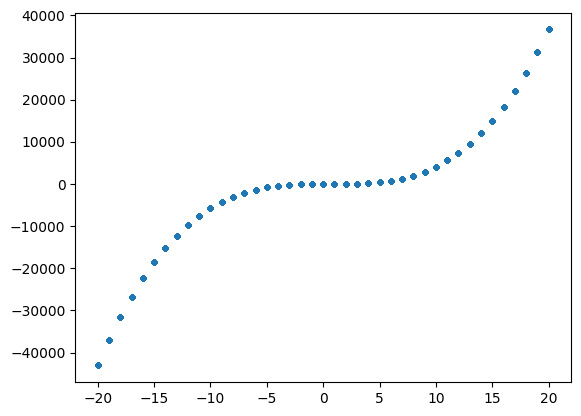

In [ ]:
y_train=polynomial(x_train)
plt.scatter(x_train,y_train, marker='.')
plt.show()

## Normalize

In [ ]:
x_min=min(x_train)
x_max=max(x_train)
y_min=min(y_train)
y_max=max(y_train)

print('Before normalize: ')
print(x_min)
print(x_max)
print(y_min)
print(y_max)

x_train = 2*((x_train - x_min)/(x_max-x_min)) -1
y_train=2*((y_train - y_min)/(y_max-y_min)) -1

print('After normalize: ')
print(x_min)
print(x_max)
print(y_min)
print(y_max)

Before normalize: 
-20
20
-43059
36661
After normalize: 
-20
20
-43059
36661


## model

In [ ]:
inputs = Input((1,))
x = Dense(32, activation = 'relu')(inputs)
x = Dense(64, activation = 'relu')(x)
x = Dense(128, activation = 'linear')(x)
outputs = Dense(1, name = 'OutputLayer', activation = 'linear')(x)
dnn_model = Model(inputs, outputs, name = 'DNN')
dnn_model.summary()

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
size=len(x_train)
x_train_data=x_train[:int(size*0.90)]
y_train_data=y_train[:int(size*.90)]

x_val=x_train[int(size*0.90):int(size*0.95)]
y_val=y_train[int(size*0.90):int(size*0.95)]

x_test=x_train[int(size*0.95):]
y_test=y_train[int(size*0.95):]


In [ ]:
dnn_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0001), metrics=[tf.keras.metrics.R2Score(name="accuracy")])
history = dnn_model.fit(x_train_data, y_train_data, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4234 - loss: 0.0994 - val_accuracy: 0.8303 - val_loss: 0.0333
Epoch 2/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8200 - loss: 0.0300 - val_accuracy: 0.8753 - val_loss: 0.0245
Epoch 3/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8740 - loss: 0.0211 - val_accuracy: 0.9262 - val_loss: 0.0145
Epoch 4/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9270 - loss: 0.0120 - val_accuracy: 0.9559 - val_loss: 0.0086
Epoch 5/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9569 - loss: 0.0072 - val_accuracy: 0.9731 - val_loss: 0.0053
Epoch 6/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9748 - loss: 0.0042 - val_accuracy: 0.9832 - val_loss: 0.0033
Epoch 7/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9837 - loss: 0.0027 - val_accuracy: 0.9890 - val_loss: 0.0022
Epoch 8/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9898 - loss: 0.0017 - val_accuracy: 0.

In [ ]:
## plot validation loss

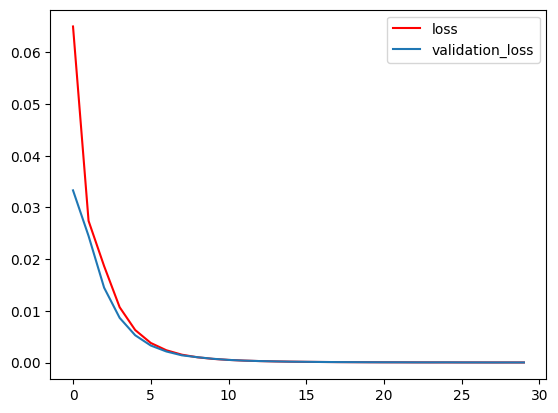

In [ ]:
plt.plot(history.history['loss'],color='red',label='loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.legend()

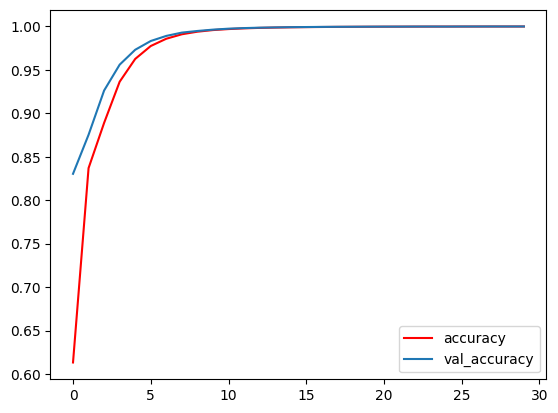

In [ ]:
plt.plot(history.history['accuracy'],color='red', label='accuracy')
plt.plot(history.history['val_accuracy'] , label='val_accuracy')
plt.legend()

In [ ]:
y_pred_test = dnn_model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
test_loss, test_acc = dnn_model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {test_acc*100:.2f}%')
print(f'Test dataset loss {test_loss :0.3f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9999 - loss: 2.2996e-05 
Test accuracy: 99.99%
Test dataset loss 0.000


In [ ]:
#Denormalizing the Test Data
x_test_true = ((x_test + 1) * (x_mx - x_mn) / 2) + x_mn
y_test_true = ((y_test + 1) * (y_mx - y_mn) / 2) + y_mn
y_pred_true = ((y_pred_test + 1) * (y_mx - y_mn) / 2) + y_mn
print(x_test_true[:10])
print(y_test_true[:10])

[ 0.55  0.05 -1.   -0.35  0.25 -0.45  0.05 -0.45  0.   -0.25]
[ 0.22102358  0.08003011 -1.          0.02865028  0.09006523 -0.02584044
  0.08003011 -0.02584044  0.08028098  0.06046162]


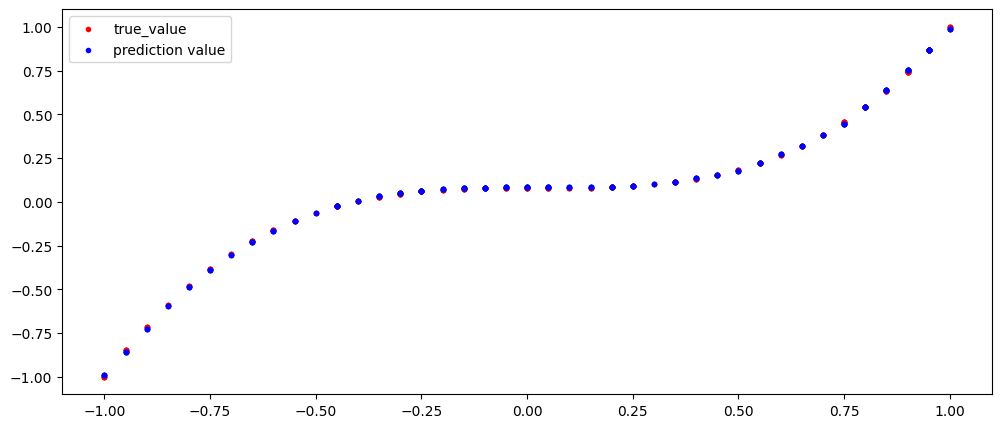

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(x_test_true, y_test_true, c='red', label='true_value', marker='.')
plt.scatter(x_test_true, y_pred_true, c='blue', label='prediction value', marker='.')

plt.legend()

In [ ]:
#Checking test and prediction
print('Actual X Value: ', x_test_true[3])
print('Actual Y Value: ', y_test_true[3])
print('Predicted Y Value: ', y_pred_true[3])

Actual X Value:  -0.35
Actual Y Value:  0.028650275965880656
Predicted Y Value:  [0.03053308]
